<h3>SMS Spam Collection Dataset</h3>

5,574 messages in English, tagged as ham (legitimate) or spam.

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
#import data and add header row
spam = pd.read_csv("SpamDataset/spam.csv", sep=",",
                  encoding = "ISO-8859-1")

In [3]:
#first six rows
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#lowercase text and removing punctuation in text to have smaller size of model in future
import string

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    return s

spam['v2'] = [normalize(s) for s in spam['v2']]
    

In [5]:
#first six rows
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,ham,u dun say so early hor u c already then say,NaN,NaN,NaN
4,ham,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN


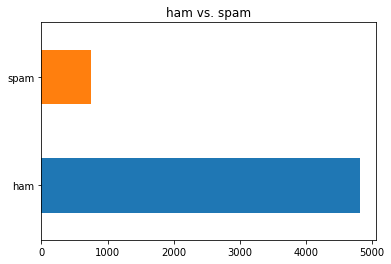

In [6]:
# pandas plot docs https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

spam['v1'].value_counts().plot(kind='barh', figsize=(6, 4), title="ham vs. spam")

In [7]:
spam['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
X = spam['v2']
y = spam['v1']

In [9]:
# Predict if a message is spam or ham

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape: {} {}".format(X_train.shape, y_train.shape))
print("Test set shape: {} {}".format(X_test.shape, y_test.shape))

clf_mnb = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', MultinomialNB(alpha=.01)),
    ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3),
}
clf_mnb = GridSearchCV(clf_mnb, parameters, n_jobs=-1)


clf_mnb = clf_mnb.fit(X_train, y_train)
clf_mnb.score(X_test, y_test)
print("Score: {} ".format(clf_mnb.score(X_test, y_test)))
print("Best params: {} ".format(clf_mnb.best_params_))

# predicted = clf_mnb.predict(X_test)
# np.mean(predicted == y_test)

Train set shape: (4457,) (4457,)
Test set shape: (1115,) (1115,)
Score: 0.9856502242152466 
Best params: {'vect__ngram_range': (1, 2), 'clf__alpha': 0.01} 


In [10]:
clf_mnb.get_params().keys()

dict_keys(['estimator__vect__stop_words', 'estimator__vect__norm', 'estimator__vect__dtype', 'param_grid', 'estimator__vect__min_df', 'return_train_score', 'verbose', 'estimator__vect__tokenizer', 'estimator__clf__alpha', 'estimator__vect__smooth_idf', 'refit', 'estimator__memory', 'n_jobs', 'cv', 'estimator__vect__sublinear_tf', 'estimator__vect__analyzer', 'estimator__clf__fit_prior', 'estimator__vect', 'estimator__vect__encoding', 'estimator__vect__preprocessor', 'estimator__vect__strip_accents', 'estimator__vect__use_idf', 'estimator__vect__decode_error', 'scoring', 'pre_dispatch', 'estimator__vect__token_pattern', 'estimator__vect__ngram_range', 'estimator__clf__class_prior', 'estimator__vect__max_df', 'estimator__vect__vocabulary', 'estimator__clf', 'fit_params', 'estimator__vect__lowercase', 'iid', 'error_score', 'estimator__steps', 'estimator', 'estimator__vect__input', 'estimator__vect__binary', 'estimator__vect__max_features'])

In [15]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names = ["Naive Bayes", "Linear SVM", "Logistic Regression", "Random Forest", "Multilayer Perceptron"]

classifiers = [
    MultinomialNB(),
    LinearSVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1)
]


parameters = [{'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(0, 1, 10))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(0, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__max_depth': (1, 2)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)}             
             ]

for name, classifier, params in zip(names, classifiers, parameters):
    clf_pipe = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', classifier),
    ])
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
    clf = gs_clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{} score: {}".format(name, score))
    



Naive Bayes score: 0.9856502242152466
Linear SVM score: 0.9811659192825112
Logistic Regression score: 0.9766816143497757
Random Forest score: 0.8654708520179372
Multilayer Perceptron score: 0.9820627802690582


In [23]:
#cross val approach
#plot validation scores for each classifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection


seed = 42

names = ["Naive Bayes", "Linear SVM", "Logistic Regression", "Random Forest", "Multilayer Perceptron"]

classifiers = [
    MultinomialNB(),
    LinearSVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1)
]


parameters = [{'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(0, 1, 10))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(0, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__max_depth': (1, 2)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)}             
             ]

results = []

for name, classifier, params in zip(names, classifiers, parameters):
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    clf_pipe = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', classifier),
    ])
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
    cv_results = model_selection.cross_val_score(gs_clf, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    out = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(out)



Naive Bayes: 0.983488 (0.003244)
Linear SVM: 0.980437 (0.003186)
Logistic Regression: 0.978104 (0.003146)
Random Forest: 0.866298 (0.010237)
Multilayer Perceptron: 0.980437 (0.001650)


[Text(0,0,'Naive Bayes'),
 Text(0,0,'Linear SVM'),
 Text(0,0,'Logistic Regression'),
 Text(0,0,'Random Forest'),
 Text(0,0,'Multilayer Perceptron')]

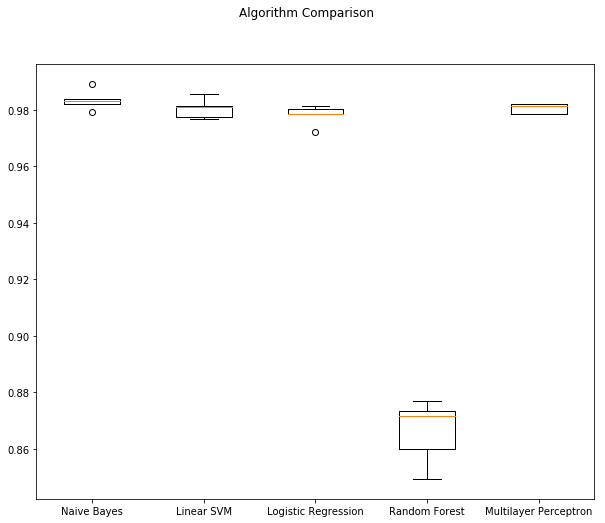

In [24]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)